In [361]:
from rxnmapper import RXNMapper
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, inchi
import re

In [362]:
# definitions
def get_mapping(product: str,
                r1: str,
                r2: str,
                radius=1):
    # Add Hs to everything
    r1 = Chem.MolToSmiles(Chem.AddHs(Chem.MolFromSmiles(r1)))
    r2 = Chem.MolToSmiles(Chem.AddHs(Chem.MolFromSmiles(r2)))
    product = Chem.MolToSmiles(Chem.AddHs(Chem.MolFromSmiles(product)))
    # string of reaction
    reaction = f"{r1}.{r2}>>{product}"
    rxnmapper = RXNMapper()
    # get atom mapped forward template
    res = rxnmapper.get_attention_guided_atom_maps([reaction])
    return res
# Function to extract mapped atoms
def extract_mapped_atoms(smiles):
    pattern = re.compile(r"(\[.*?:([0-9]+)\])")
    matches = pattern.findall(smiles)
    return {int(match[1]): match[0] for match in matches}
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
    # For each atom, set the property "atomNote" to a index+1 of the atom
        atom.SetProp("atomNote", str(atom.GetIdx()))
    return mol
def map_reactant_to_index(r_smarts: str):
    product_to_reactant = {}
    r_mol = Chem.MolFromSmarts(r_smarts)
    for atom in r_mol.GetAtoms():
        atom_idx = atom.GetIdx()
        atom_map_num = atom.GetAtomMapNum()
        product_to_reactant[atom_map_num] = atom_idx
    return product_to_reactant
def show_mapped_atoms_reactant(r_smiles: str,
                               map_product_to_reactant: dict):
    r_mol = Chem.MolFromSmiles(r_smiles)
    # invert dictionaries values to keys
    map_reactant_to_product = {v: k for k, v in map_product_to_reactant.items()}
    for atom in r_mol.GetAtoms():
        atom_idx = atom.GetIdx()
        if atom_idx in map_reactant_to_product.keys():
            atom.SetProp("atomNote", str(map_reactant_to_product[atom_idx]))
    return r_mol
def compare_by_inchi(mol1,
                     mol2):
    if mol1 is None or mol2 is None:
        raise ValueError("One of the SMILES strings is invalid.")
    # convert each back to smiles then back to mol
    mol1 = Chem.MolFromSmiles(Chem.MolToSmiles(mol1))
    mol2 = Chem.MolFromSmiles(Chem.MolToSmiles(mol2))
    # Generate InChI keys for both molecules
    inchi_key1 = inchi.MolToInchiKey(mol1)
    print(inchi_key1)
    inchi_key2 = inchi.MolToInchiKey(mol2)
    print(inchi_key2)
    # Compare InChI keys
    return inchi_key1 == inchi_key2

In [363]:
# df = pd.read_pickle('/Users/kate_fieseler/PycharmProjects/syndirella/syndirella/tests/vectors/5_bases_w_routes.pkl.gz')
# # only look at first and third
# df = df.iloc[[0, 2]]
# df.reset_index(drop=True, inplace=True)
# df

In [364]:
# # add columns
# to_add = ['3_prod_to_r1',
#           '3_prod_to_r2',
#           '2_prod_to_r1',
#           '2_prod_to_r2',
#           '1_prod_to_r1',
#           '1_prod_to_r2']
# for col in to_add:
#     df[col] = None
# df

In [365]:
# # order columns to put prod to r1 and prod to r2 before the product smiles
# df = df[['base_compound_smiles', '1_reaction', '1_r1_smiles', '1_r2_smiles', '1_product_smiles', '1_r_previous_product', '1_prod_to_r1', '1_prod_to_r2',
#          '2_reaction', '2_r1_smiles', '2_r2_smiles', '2_product_smiles', '2_r_previous_product', '2_prod_to_r1', '2_prod_to_r2',
#          '3_reaction', '3_r1_smiles', '3_r2_smiles', '3_product_smiles', '3_r_previous_product', '3_prod_to_r1', '3_prod_to_r2']]
# df.to_pickle('/Users/kate_fieseler/PycharmProjects/syndirella/syndirella/tests/vectors/2_test_set_rxnmapper.pkl.gz')

In [366]:
df = pd.read_pickle('/Users/kate_fieseler/PycharmProjects/syndirella/syndirella/tests/vectors/2_test_set_rxnmapper.pkl.gz')
# add column mapped smarts
df['1_product_mapped_smarts'] = None
df['2_product_mapped_smarts'] = None
df['3_product_mapped_smarts'] = None
df = df[['base_compound_smiles', '1_reaction', '1_r1_smiles', '1_r2_smiles', '1_product_smiles', '1_product_mapped_smarts', '1_r_previous_product', '1_prod_to_r1', '1_prod_to_r2',
         '2_reaction', '2_r1_smiles', '2_r2_smiles', '2_product_smiles', '2_product_mapped_smarts', '2_r_previous_product', '2_prod_to_r1', '2_prod_to_r2',
         '3_reaction', '3_r1_smiles', '3_r2_smiles', '3_product_smiles', '3_product_mapped_smarts', '3_r_previous_product', '3_prod_to_r1', '3_prod_to_r2']]
df

,base_compound_smiles,1_reaction,1_r1_smiles,1_r2_smiles,1_product_smiles,1_product_mapped_smarts,1_r_previous_product,1_prod_to_r1,1_prod_to_r2,2_reaction,...,2_prod_to_r1,2_prod_to_r2,3_reaction,3_r1_smiles,3_r2_smiles,3_product_smiles,3_product_mapped_smarts,3_r_previous_product,3_prod_to_r1,3_prod_to_r2
0,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC(C)(C)OC(=O)Nc1cccc(N)c1,CC(C)(C)OC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,None,None,"{0: 0, 15: 1, 16: 2, 17: 3, 18: 4, 19: 5, 20: ...","{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: ...",N-Boc_deprotection,...,"{0: 6, 1: 7, 2: 8, 3: 9, 4: 10, 5: 11, 6: 12, ...",None,Amidation,N#CCC(=O)O,Nc1cccc(NC(=O)C2CCCO2)c1,N#CCC(=O)Nc1cccc(NC(=O)[C@@H]2CCCO2)c1,None,2,"{0: 0, 4: 1, 3: 2, 2: 3, 1: 4, 5: 5}","{6: 0, 7: 1, 8: 2, 9: 3, 10: 4, 11: 5, 12: 6, ..."
1,Cn1ncc(NC(=O)CC#N)c1NC(=O)C1CCCO1,Amidation,O=C(O)C1CCCO1,Cn1ncc(NC(=O)OC(C)(C)C)c1N,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1,None,None,"{0: 0, 16: 1, 17: 2, 18: 3, 19: 4, 20: 5, 21: ...","{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: ...",N-Boc_deprotection,...,"{0: 6, 6: 7, 5: 8, 4: 9, 3: 10, 2: 11, 1: 12, ...",None,Amidation,N#CCC(=O)O,Cn1ncc(N)c1NC(=O)C1CCCO1,Cn1ncc(NC(=O)CC#N)c1NC(=O)[C@@H]1CCCO1,None,2,"{0: 0, 7: 1, 8: 2, 9: 3, 10: 4, 11: 5}","{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 12: 6, 13..."


In [367]:
row_num = 0
reaction_step = 1
row = df.iloc[row_num]

In [368]:
r1_smiles = row[f'{reaction_step}_r1_smiles']
r2_smiles = row[f'{reaction_step}_r2_smiles']
product = row[f'{reaction_step}_product_smiles']
res = get_mapping(product=product,r1=r1_smiles,r2=r2_smiles)
res

[{'confidence': 0.40505467329349976,
  'mapped_rxn': '[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7])[NH:8][c:9]1[cH:10][cH:11][cH:12][c:13]([NH2:14])[cH:22]1.O[C:15](=[O:16])[CH:17]1[CH2:18][CH2:19][CH2:20][O:21]1>>[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7])[NH:8][c:9]1[cH:10][cH:11][cH:12][c:13]([NH:14][C:15](=[O:16])[CH:17]2[CH2:18][CH2:19][CH2:20][O:21]2)[cH:22]1'}]

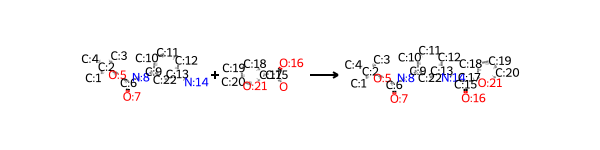

In [369]:
rxn_smarts = res[0]['mapped_rxn']
AllChem.ReactionFromSmarts(rxn_smarts)

In [370]:
reactants, product = rxn_smarts.split('>>')
r1, r2 = reactants.split('.')

In [371]:
# check that ordering of reactants hasn't changed after splitting
compare_by_inchi(Chem.MolFromSmarts(r2), Chem.MolFromSmiles(row[f'{reaction_step}_r1_smiles']))

UJJLJRQIPMGXEZ-UHFFFAOYSA-N
UJJLJRQIPMGXEZ-UHFFFAOYSA-N


True

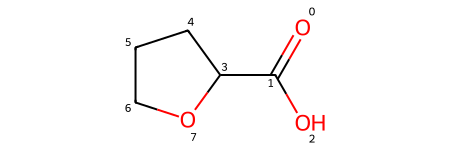

In [372]:
# show base atom numbers in reactant 1
mol_with_atom_index(Chem.MolFromSmiles(r1_smiles))

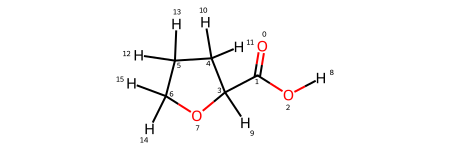

In [373]:
mol_with_atom_index(Chem.AddHs(Chem.MolFromSmiles(r1_smiles)))

In [374]:
Chem.MolToSmiles(Chem.AddHs(Chem.MolFromSmiles(r1_smiles)))

'[H]OC(=O)C1([H])OC([H])([H])C([H])([H])C1([H])[H]'

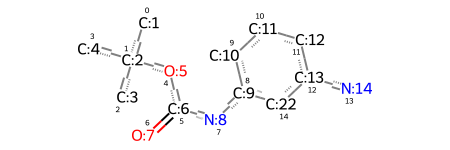

In [375]:
mol_with_atom_index(Chem.MolFromSmarts(r1))

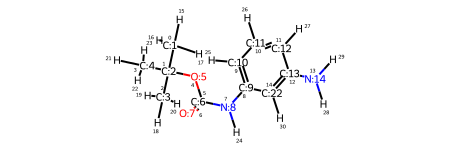

In [376]:
mol_with_atom_index(Chem.AddHs(Chem.MolFromSmiles(r1)))

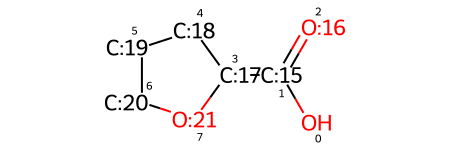

In [377]:
mol_with_atom_index(Chem.MolFromSmiles(r2))

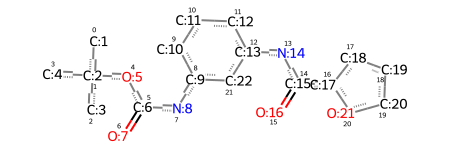

In [378]:
mol_with_atom_index(Chem.MolFromSmarts(product))

In [379]:
rxn_prod_to_r = map_reactant_to_index(r2)
rxn_prod_to_r

{0: 0, 15: 1, 16: 2, 17: 3, 18: 4, 19: 5, 20: 6, 21: 7}

In [380]:
df['1_prod_to_r2'][row_num] = rxn_prod_to_r
df

,base_compound_smiles,1_reaction,1_r1_smiles,1_r2_smiles,1_product_smiles,1_product_mapped_smarts,1_r_previous_product,1_prod_to_r1,1_prod_to_r2,2_reaction,...,2_prod_to_r1,2_prod_to_r2,3_reaction,3_r1_smiles,3_r2_smiles,3_product_smiles,3_product_mapped_smarts,3_r_previous_product,3_prod_to_r1,3_prod_to_r2
0,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC(C)(C)OC(=O)Nc1cccc(N)c1,CC(C)(C)OC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,None,None,"{0: 0, 15: 1, 16: 2, 17: 3, 18: 4, 19: 5, 20: ...","{0: 0, 15: 1, 16: 2, 17: 3, 18: 4, 19: 5, 20: ...",N-Boc_deprotection,...,"{0: 6, 1: 7, 2: 8, 3: 9, 4: 10, 5: 11, 6: 12, ...",None,Amidation,N#CCC(=O)O,Nc1cccc(NC(=O)C2CCCO2)c1,N#CCC(=O)Nc1cccc(NC(=O)[C@@H]2CCCO2)c1,None,2,"{0: 0, 4: 1, 3: 2, 2: 3, 1: 4, 5: 5}","{6: 0, 7: 1, 8: 2, 9: 3, 10: 4, 11: 5, 12: 6, ..."
1,Cn1ncc(NC(=O)CC#N)c1NC(=O)C1CCCO1,Amidation,O=C(O)C1CCCO1,Cn1ncc(NC(=O)OC(C)(C)C)c1N,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1,None,None,"{0: 0, 16: 1, 17: 2, 18: 3, 19: 4, 20: 5, 21: ...","{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: ...",N-Boc_deprotection,...,"{0: 6, 6: 7, 5: 8, 4: 9, 3: 10, 2: 11, 1: 12, ...",None,Amidation,N#CCC(=O)O,Cn1ncc(N)c1NC(=O)C1CCCO1,Cn1ncc(NC(=O)CC#N)c1NC(=O)[C@@H]1CCCO1,None,2,"{0: 0, 7: 1, 8: 2, 9: 3, 10: 4, 11: 5}","{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 12: 6, 13..."


In [381]:
df['1_product_mapped_smarts'][row_num] = product
df

,base_compound_smiles,1_reaction,1_r1_smiles,1_r2_smiles,1_product_smiles,1_product_mapped_smarts,1_r_previous_product,1_prod_to_r1,1_prod_to_r2,2_reaction,...,2_prod_to_r1,2_prod_to_r2,3_reaction,3_r1_smiles,3_r2_smiles,3_product_smiles,3_product_mapped_smarts,3_r_previous_product,3_prod_to_r1,3_prod_to_r2
0,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC(C)(C)OC(=O)Nc1cccc(N)c1,CC(C)(C)OC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,None,"{0: 0, 15: 1, 16: 2, 17: 3, 18: 4, 19: 5, 20: ...","{0: 0, 15: 1, 16: 2, 17: 3, 18: 4, 19: 5, 20: ...",N-Boc_deprotection,...,"{0: 6, 1: 7, 2: 8, 3: 9, 4: 10, 5: 11, 6: 12, ...",None,Amidation,N#CCC(=O)O,Nc1cccc(NC(=O)C2CCCO2)c1,N#CCC(=O)Nc1cccc(NC(=O)[C@@H]2CCCO2)c1,None,2,"{0: 0, 4: 1, 3: 2, 2: 3, 1: 4, 5: 5}","{6: 0, 7: 1, 8: 2, 9: 3, 10: 4, 11: 5, 12: 6, ..."
1,Cn1ncc(NC(=O)CC#N)c1NC(=O)C1CCCO1,Amidation,O=C(O)C1CCCO1,Cn1ncc(NC(=O)OC(C)(C)C)c1N,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1,None,None,"{0: 0, 16: 1, 17: 2, 18: 3, 19: 4, 20: 5, 21: ...","{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: ...",N-Boc_deprotection,...,"{0: 6, 6: 7, 5: 8, 4: 9, 3: 10, 2: 11, 1: 12, ...",None,Amidation,N#CCC(=O)O,Cn1ncc(N)c1NC(=O)C1CCCO1,Cn1ncc(NC(=O)CC#N)c1NC(=O)[C@@H]1CCCO1,None,2,"{0: 0, 7: 1, 8: 2, 9: 3, 10: 4, 11: 5}","{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 12: 6, 13..."


In [382]:
# do it all in a loop
for index, row in df.iterrows():
    for reaction_step in [1, 2, 3]:
        r1_smiles = row[f'{reaction_step}_r1_smiles']
        r2_smiles = row[f'{reaction_step}_r2_smiles']
        product = row[f'{reaction_step}_product_smiles']
        res = get_mapping(product=product,r1=r1_smiles,r2=r2_smiles)
        rxn_smarts = res[0]['mapped_rxn']
        reactants, product = rxn_smarts.split('>>')
        try:
            r1, r2 = reactants.split('.')
        except: # for single step reactions
            r1 = reactants
            r2 = None
        print(f"r1: {r1}, r2: {r2}, product: {product}")
        reactant_strings = ['r1', 'r2']
        # make sure the ordering of reactants hasn't changed, if so switch them
        if not compare_by_inchi(Chem.MolFromSmarts(r1), Chem.MolFromSmiles(row[f'{reaction_step}_r1_smiles'])):
            print(f"Switching reactants for row {index} in reaction step {reaction_step}")
            #reactant_strings = ['r2', 'r1']
            r1, r2 = r2, r1
        for r_string, reactant in zip(reactant_strings,[r1, r2]):
            if f'{reaction_step}_{r_string}_smarts' not in df.columns:
                df[f'{reaction_step}_{r_string}_smarts'] = None
            df[f'{reaction_step}_{r_string}_smarts'][index] = reactant
            print(f"Mapping product to {r_string} for row {index} in reaction step {reaction_step}")
            print(r_string, reactant)
            if reactant is None:
                continue
            rxn_prod_to_r = map_reactant_to_index(reactant)
            df[f'{reaction_step}_prod_to_{r_string}'][index] = rxn_prod_to_r
        df[f'{reaction_step}_product_mapped_smarts'][index] = product
df

r1: [CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7])[NH:8][c:9]1[cH:10][cH:11][cH:12][c:13]([NH2:14])[cH:22]1, r2: O[C:15](=[O:16])[CH:17]1[CH2:18][CH2:19][CH2:20][O:21]1, product: [CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7])[NH:8][c:9]1[cH:10][cH:11][cH:12][c:13]([NH:14][C:15](=[O:16])[CH:17]2[CH2:18][CH2:19][CH2:20][O:21]2)[cH:22]1
IEUIEMIRUXSXCL-UHFFFAOYSA-N
UJJLJRQIPMGXEZ-UHFFFAOYSA-N
Switching reactants for row 0 in reaction step 1
Mapping product to r1 for row 0 in reaction step 1
r1 O[C:15](=[O:16])[CH:17]1[CH2:18][CH2:19][CH2:20][O:21]1
Mapping product to r2 for row 0 in reaction step 1
r2 [CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7])[NH:8][c:9]1[cH:10][cH:11][cH:12][c:13]([NH2:14])[cH:22]1
r1: CC(C)(C)OC(=O)[NH:1][c:2]1[cH:3][cH:4][cH:5][c:6]([NH:7][C:8](=[O:9])[CH:10]2[CH2:11][CH2:12][CH2:13][O:14]2)[cH:15]1, r2: None, product: [NH2:1][c:2]1[cH:3][cH:4][cH:5][c:6]([NH:7][C:8](=[O:9])[CH:10]2[CH2:11][CH2:12][CH2:13][O:14]2)[cH:15]1
DYZHVLVLAXUPHV-UHFFFAOYSA-N
DYZHVLVLAX

,base_compound_smiles,1_reaction,1_r1_smiles,1_r2_smiles,1_product_smiles,1_product_mapped_smarts,1_r_previous_product,1_prod_to_r1,1_prod_to_r2,2_reaction,...,3_product_mapped_smarts,3_r_previous_product,3_prod_to_r1,3_prod_to_r2,1_r1_smarts,1_r2_smarts,2_r1_smarts,2_r2_smarts,3_r1_smarts,3_r2_smarts
0,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC(C)(C)OC(=O)Nc1cccc(N)c1,CC(C)(C)OC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,None,"{0: 0, 15: 1, 16: 2, 17: 3, 18: 4, 19: 5, 20: ...","{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: ...",N-Boc_deprotection,...,[N:1]#[C:2][CH2:3][C:4](=[O:5])[NH:6][c:7]1[cH...,2,"{0: 0, 4: 1, 3: 2, 2: 3, 1: 4, 5: 5}","{6: 0, 7: 1, 8: 2, 9: 3, 10: 4, 11: 5, 12: 6, ...",O[C:15](=[O:16])[CH:17]1[CH2:18][CH2:19][CH2:2...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,CC(C)(C)OC(=O)[NH:1][c:2]1[cH:3][cH:4][cH:5][c...,None,O[C:4]([CH2:3][C:2]#[N:1])=[O:5],[NH2:6][c:7]1[cH:8][cH:9][cH:10][c:11]([NH:12]...
1,Cn1ncc(NC(=O)CC#N)c1NC(=O)C1CCCO1,Amidation,O=C(O)C1CCCO1,Cn1ncc(NC(=O)OC(C)(C)C)c1N,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1,[CH3:1][n:2]1[n:3][cH:4][c:5]([NH:6][C:7](=[O:...,None,"{0: 0, 16: 1, 17: 2, 18: 3, 19: 4, 20: 5, 21: ...","{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: ...",N-Boc_deprotection,...,[CH3:1][n:2]1[n:3][cH:4][c:5]([NH:6][C:7](=[O:...,2,"{0: 0, 7: 1, 8: 2, 9: 3, 10: 4, 11: 5}","{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 12: 6, 13...",O[C:16](=[O:17])[CH:18]1[CH2:19][CH2:20][CH2:2...,[CH3:1][n:2]1[n:3][cH:4][c:5]([NH:6][C:7](=[O:...,CC(C)(C)OC(=O)[NH:6][c:5]1[cH:4][n:3][n:2]([CH...,None,O[C:7](=[O:8])[CH2:9][C:10]#[N:11],[CH3:1][n:2]1[n:3][cH:4][c:5]([NH2:6])[c:12]1[...


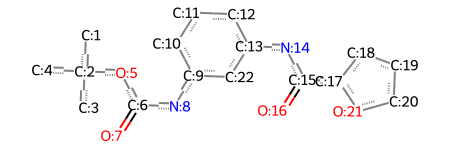

In [401]:
row_num = 0
reaction_step = 1
# show product
Chem.MolFromSmarts(df[f'{reaction_step}_product_mapped_smarts'][row_num])

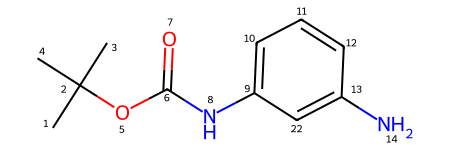

In [402]:
show_mapped_atoms_reactant(df[f'{reaction_step}_r2_smiles'][row_num], df[f'{reaction_step}_prod_to_r2'][row_num])

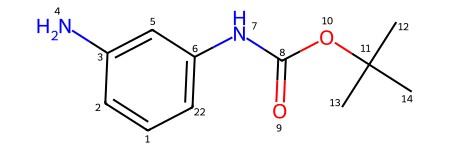

In [403]:
# does it change with Hs added?
show_mapped_atoms_reactant(Chem.MolToSmiles(Chem.AddHs(Chem.MolFromSmiles(df[f'{reaction_step}_r2_smiles'][row_num]))), df[f'{reaction_step}_prod_to_r2'][row_num])

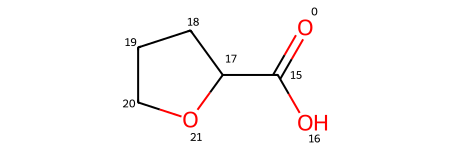

In [404]:
show_mapped_atoms_reactant(df[f'{reaction_step}_r1_smiles'][row_num], df[f'{reaction_step}_prod_to_r1'][row_num])

In [405]:
Chem.MolFromSmarts(df[f'{reaction_step}_r1_smarts'][row_num])
{0: 0, 4: 1, 3: 2, 2: 3, 1: 4, 5: 5}

{0: 0, 4: 1, 3: 2, 2: 3, 1: 4, 5: 5}

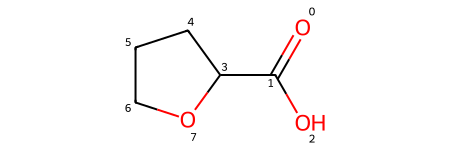

In [406]:
mol_with_atom_index(Chem.MolFromSmiles(df[f'{reaction_step}_r1_smiles'][row_num]))

In [407]:
for r_string, reactant in zip(reactant_strings,[r1, r2]):
    print(r_string, reactant)

r1 O[C:7](=[O:8])[CH2:9][C:10]#[N:11]
r2 [CH3:1][n:2]1[n:3][cH:4][c:5]([NH2:6])[c:12]1[NH:13][C:14](=[O:15])[CH:16]1[CH2:17][CH2:18][CH2:19][O:20]1


In [389]:
smarts = Chem.MolFromSmarts('CC(C)(C)OC(=O)[NH:1][c:2]1[cH:3][cH:4][cH:5][c:6]([NH:7][C:8](=[O:9])[CH:10]2[CH2:11][CH2:12][CH2:13][O:14]2)[cH:15]1')

In [390]:
smiles = Chem.MolFromSmiles('CC(C)(C)OC(=O)Nc1cccc(NC(=O)C2CCCO2)c1')

In [391]:
compare_by_inchi(smarts, smiles)

DYZHVLVLAXUPHV-UHFFFAOYSA-N
DYZHVLVLAXUPHV-UHFFFAOYSA-N


True

In [392]:
#df.to_pickle('/Users/kate_fieseler/PycharmProjects/syndirella/syndirella/tests/vectors/2_test_set_rxnmapper_w_smarts.pkl.gz')

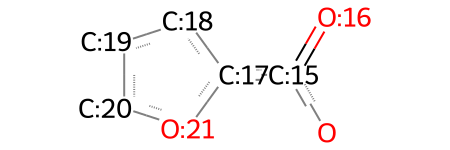

In [408]:
# need to check that atom numbers are the same after adding Hs
mol = Chem.MolFromSmarts(df[f'{reaction_step}_r1_smarts'][row_num])
mol

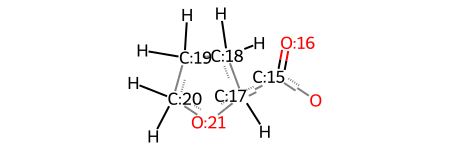

In [409]:
Chem.AddHs(mol)

# Thinkings:
- Could just store SMARTS labeled with atom numbers from RXNMapper, then it is direct mapping. Could be attached to the reaction object. 
- Since the atom indicies in the mol object from SMILES are not the same as the mol object from SMARTS
- Then it is just mappping from reactant to elaborations of reactant...